In [6]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"punitchaurasia98","key":"ced1bae57efb640c545e5982faa62449"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 252MB/s]
100% 1.06G/1.06G [00:08<00:00, 135MB/s]


In [9]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/cat_dog_data')


In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [21]:
train_df=keras.utils.image_dataset_from_directory (
 directory ='/content/cat_dog_data/train',
 labels='inferred',
 label_mode ='int',
 batch_size=32,
 image_size=(256,256)
  )

validation_df=keras.utils.image_dataset_from_directory(
 directory ='/content/cat_dog_data/test' ,
 labels='inferred',
 label_mode ='int',
 batch_size=32,
 image_size=(256,256)
  )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
#Normalise
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

  train_df=train_df.map(process)
  validation_df=validation_df.map(process)

In [ ]:
# NORMALISE      from tensorflow.keras.layers import Rescaling

#normalization_layer = Rescaling(1./255)
#train_df = train_df.map(lambda x, y: (normalization_layer(x), y))
#validation_df = validation_df.map(lambda x, y: (normalization_layer(x), y))



In [23]:
# Creating CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(train_df,epochs=10,validation_data=validation_df)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5803 - loss: 1.6124 - val_accuracy: 0.6862 - val_loss: 0.5866
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 75ms/step - accuracy: 0.6798 - loss: 0.5994 - val_accuracy: 0.7298 - val_loss: 0.5456
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7567 - loss: 0.5025 - val_accuracy: 0.7856 - val_loss: 0.4552
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.8067 - loss: 0.4177 - val_accuracy: 0.7806 - val_loss: 0.5064
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8375 - loss: 0.3611 - val_accuracy: 0.7742 - val_loss: 0.6098
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 87ms/step - accuracy: 0.8764 - loss: 0.2915 - val_accuracy: 0.7688 - val_loss: 0.8876
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.9174 - loss: 0.2049 - val_accuracy: 0.7496 - val_loss: 0.7305
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9503 - loss: 0.1313 - 

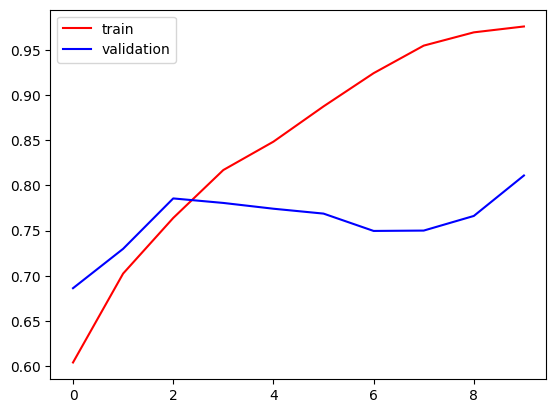

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

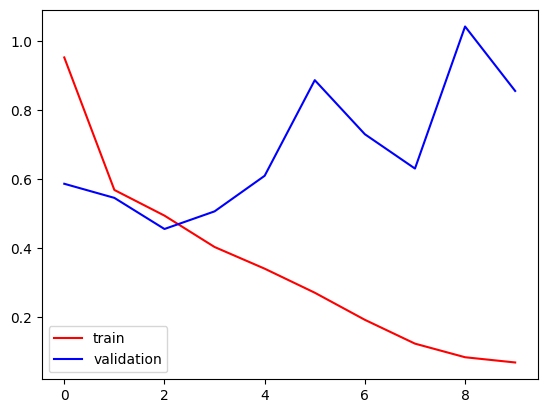

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [29]:
import cv2

In [30]:
test_img=cv2.imread('/content/cat.jpg')

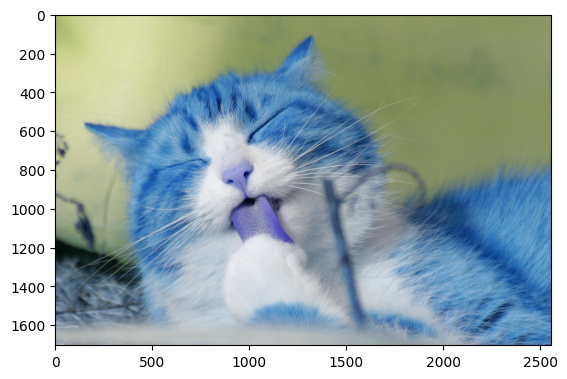

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(1704, 2557, 3)

In [33]:
test_img=cv2.resize(test_img,(256,256))

In [34]:
# creating batch
test_input=test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step


array([[0.00016167]], dtype=float32)